# Information Theory

In [1]:
import numpy as np

In [18]:
events = ['red','green','yellow']
p = [0.10,0.40,0.50]
q = [0.80,0.15,0.05]

def KL_divergence(p,q):
    return sum([p[i] * np.log(p[i]/q[i]) for i in range(len(p))])

In [12]:
kl_pq = KL_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = KL_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.336 bits
KL(Q || P): 1.401 bits


In [13]:
from scipy.special import rel_entr
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f bits' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f bits' % sum(kl_qp))

KL(P || Q): 1.336 bits
KL(Q || P): 1.401 bits


#### Jensen-Shannon Divergence

In [30]:
def KL_divergence(p,q):
    return sum([p[i] * np.log2(p[i]/q[i]) for i in range(len(p))])

def js_divergence(p,q):
    m = 0.5 * (p + q) 
    return (KL_divergence(p,m) + KL_divergence(q,m)) * 0.5

In [31]:
p = np.array([0.10,0.40,0.50])
q = np.array([0.80,0.15,0.05])


js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % np.sqrt(js_pq))
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % np.sqrt(js_qp))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


In [32]:
from scipy.spatial.distance import jensenshannon
js_pq = jensenshannon(p, q, base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(q, p, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

JS(P || Q) Distance: 0.648
JS(Q || P) Distance: 0.648


### Information Gain

For example, we may wish to evaluate the impact on purity by splitting a dataset S by a
random variable with a range of values. This can be calculated as follows:
IG(S; a) = H(S) - H(Sja)
Where IG(S; a) is the information for the dataset S for the variable a for a random variable,
H(S) is the entropy for the dataset before any change (described above) and H(Sja) is the
conditional entropy for the dataset given the variable a. This calculation describes the gain in
the dataset S for the variable a. It is the number of bits saved when transforming the dataset.
The conditional entropy can be calculated by splitting the dataset into groups for each observed
value of a and calculating the sum of the ratio of examples in each group out of the entire
dataset multiplied by the entropy of each group.

H(S|a) = SIGMA{vEa} Sa(v)/S * H(Sa(v))

Where Sa(v)/S is the ratio of the number of examples in the dataset with variable a has the
value v, and H(Sa(v)) is the entropy of group of samples where variable a has the value v. This
might sound a little confusing. We can make the calculation of information gain concrete with a
worked example.

In this section, we will make the calculation of information gain concrete with a worked example.
We can define a function to calculate the entropy of a group of samples based on the ratio of
samples that belong to class 0 and class 1.

In [33]:
from math import log2

def entropy(class0,class1):
    return -(class0 * log2(class0) + class1 * log2(class1))
#Now, consider a dataset with 20 examples, 13 for class 0 and 7 for class 1.
#split the main dataset
class0 = 13/20
class1 = 7/20
#entropy before the change
s_entropy = entropy(class0,class1)
print("Dataset Entropy: ",s_entropy)

# Now consider that one of the variables in the dataset has two unique values, say value1 and
# value2. We are interested in calculating the information gain of this variable. Let's assume
# that if we split the dataset by value1, we have a group of eight samples, seven for class 0 and
# one for class 1. We can then calculate the entropy of this group of samples.

#split 1 (split via value1)
s1_class0 = 7/8
s1_class1 = 1/8
# calculate entropy of first group
s1_entropy = entropy(s1_class0,s1_class1)
print("Group1 Entropy: ", s1_entropy)

#split 2 (split via value2)
s2_class0 = 6/12
s2_class1 = 6/12
# calculate entropy of first group
s2_entropy = entropy(s2_class0,s2_class1)
print("Group1 Entropy: ", s2_entropy)

#calculate info gain

# The first variable resulted in a group
# of eight examples from the dataset, and the second 
# group had the remaining 12 samples in the data set.

gain = s_entropy - ((8/20) * s1_entropy + 12/20 * s2_entropy)
print("Gain: ",gain)

Dataset Entropy:  0.934068055375491
Group1 Entropy:  0.5435644431995964
Group1 Entropy:  1.0
Gain:  0.11664227809565242


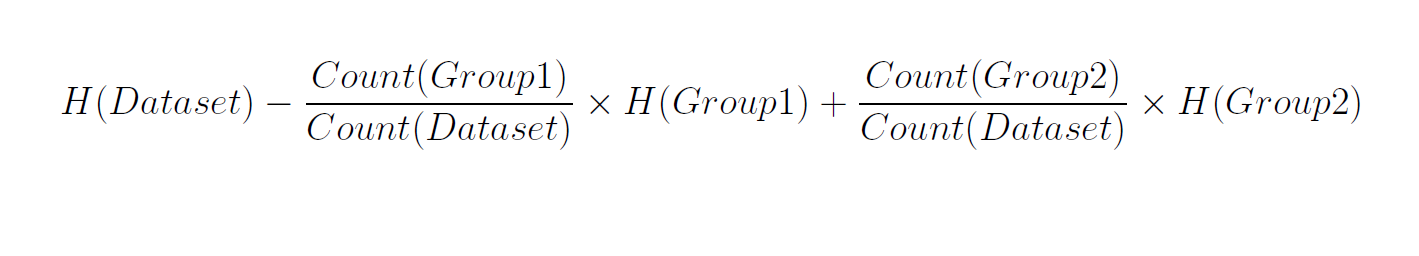